# Setup

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform, pdist
import matplotlib.pyplot as plt
from ortools.linear_solver import pywraplp
%matplotlib inline

# plotting cities and tour
def plot_tsp(df, tour=None, open_tour=False):
    plt.figure(figsize=(10,10))
    plt.scatter(df.x, df.y)
    if tour:
        for i, j in tour:
            x1 = df.loc[i]['x']
            x2 = df.loc[j]['x']
            y1 = df.loc[i]['y']
            y2 = df.loc[j]['y']
            plt.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['id'])
            plt.text(df.loc[j]['x'], df.loc[j]['y'], df.loc[j]['id'])
            x = [x1, x2]
            y = [y1, y2]
            if j == 0:
                if not open_tour:
                    plt.plot(x, y, 'r')
            else:
                plt.plot(x, y, 'b')

# Ler dataset

In [2]:
filename = '15_cidades.csv'
df = pd.read_csv(filename)
matriz_distancias = squareform(pdist(df))

# Mostrar cidades nas coordenadas X,Y

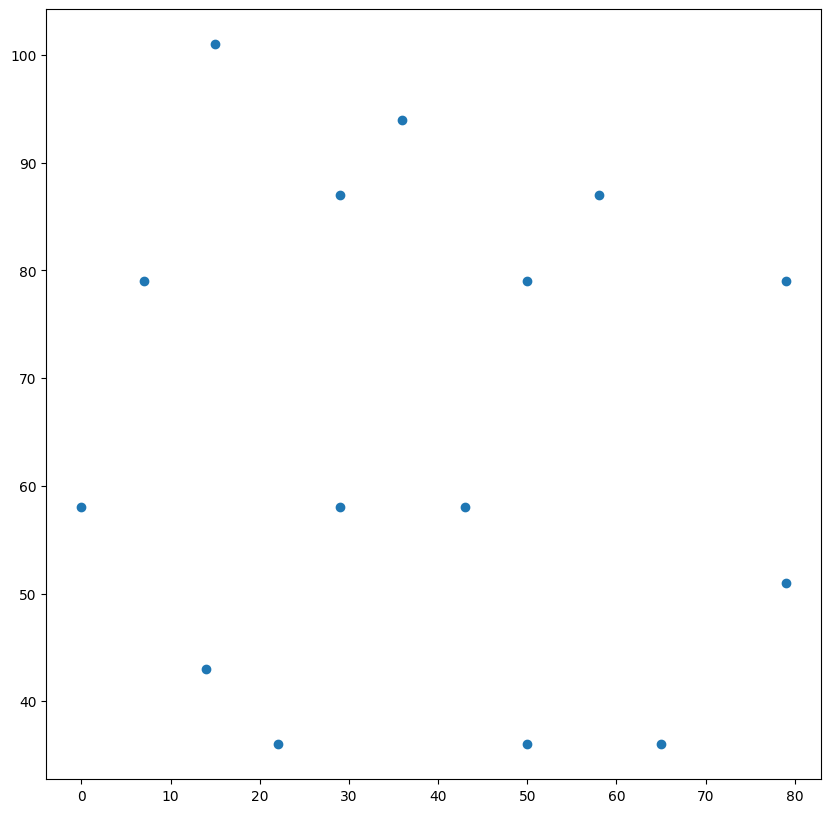

In [3]:
plot_tsp(df)

# Definindo Funcao Para Resolver o Caixeiro Viajante pela Heurística Gananciosa

In [4]:
def caixeiro_ganancioso(dataset, matriz_distancias):
    # defino a distancia total
    distancia_total = 0
    # numero de cidades
    N = dataset.shape[0]
    # definindo a cidade de origem
    origem = 0
    # definindo a cidade atual
    atual = 0
    # criando o conjunto tour
    tour = []
    # criando o conjunto solucao
    s = [origem]
    # criando o conjunto de cidades a serem visitadas
    W = [i for i in range(1, N)]
    # enquanto W não for vazio
    while len(W) > 0:
        # busco o vizinho mais proximo
        W.sort(key = lambda i: matriz_distancias[atual][i])
        # e o removo de W
        mais_proximo = W.pop()
        # adiciono o vizinho mais proximo ao conjunto solucao
        s.append(mais_proximo)
        # atualizo o conjunto tour
        tour.append((atual, mais_proximo))
        # atualizo a distancia total
        distancia_total += matriz_distancias[atual][mais_proximo]
        # atualizo a cidade atual
        atual = mais_proximo
    # retorno a origem
    s.append(origem)
    tour.append((atual, origem))
    distancia_total += matriz_distancias[atual][origem]
    return s, distancia_total, tour

Caminho: [1, 3, 11, 5, 4, 7, 6, 15, 14, 13, 12, 2, 10, 9, 8, 1]
Distancia Total: 888.83 milhas


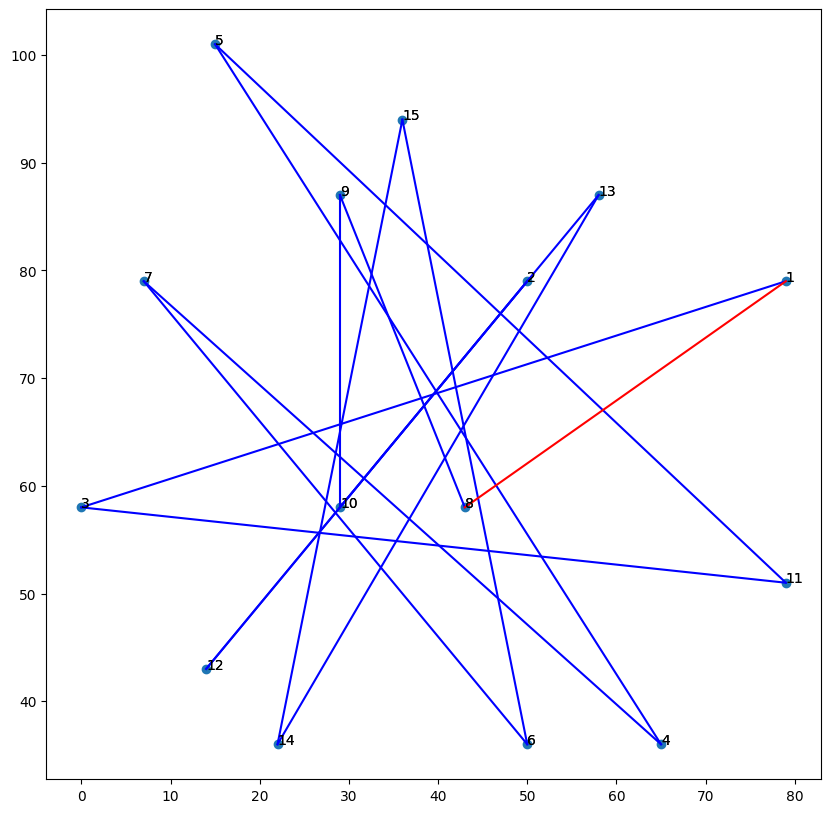

In [5]:
caminho, distancia_total, tour  = caixeiro_ganancioso(df, matriz_distancias)
print('Caminho: {}'.format(list(map(lambda x: x + 1, caminho))))
print('Distancia Total: {:.2f} milhas'.format(distancia_total))
plot_tsp(df, tour)